# Data from Supernova Simulations - Garching Group

Here we take neutrino emisson (Luminosity and spectrum) from supernova simulations.

The data came from the Garching group: https://wwwmpa.mpa-garching.mpg.de/ccsnarchive/data/Bollig2016/.

The files contain time, luminosity, $E$ and $E^2$ of each flavor ($\nu_e, \bar{\nu}_e, \nu_x=\{\nu_\mu,\nu_\tau,\bar{\nu}_\mu, \bar{\nu}_\tau \}$) for different mass progenitors and equation of state used. More information in:

[Supernova Neutrinos: Production, Oscillations and Detection - A. Mirizzi, et al.](https://arxiv.org/abs/1508.00785)

[Supernova neutrino physics with xenon dark matter detectors: A timely perspective - Rafael F. Lang, et al.](https://arxiv.org/pdf/1606.09243)

To calculate $\alpha$ we can use the relation:

$$\frac{\left \langle E^2 \right \rangle}{ \left \langle E \right \rangle^2}=\frac{2+\alpha}{1+\alpha} \;\;\; \rightarrow \;\;\; \alpha = \frac{2 \left \langle E \right \rangle^2 - \left \langle E^2 \right \rangle}{\left \langle E^2 \right \rangle - \left \langle E \right \rangle^2}$$

In [1]:
#Importing Libraries
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.special import gamma
import math 
import scipy.integrate as integrate
import time
from scipy.stats import chi2
import os.path
import pandas as pd 
from scipy.interpolate import interp1d
from IPython.display import HTML
# !pip install iminuit
# from iminuit import Minuit


Bad key text.latex.preview in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /home/pedroc/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default qualit

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
root_folder="/home/pedroc/Documentos/pedro/Mestradives/Supernova_Simulation_Data_Garching/"

In [4]:
#Function for Neutrino Spectrum (phi)
erg_to_MeV=6.2415*10**5

def phi(E,E_0,L,alpha,D):  
    #E[MeV], E_0[MeV], L[10⁵²ergs], alpha, D[kpc]
    D = D *3.086*10**21 # kpc to cm
    L=L*(10**52)*erg_to_MeV
    N=((alpha+1)**(alpha+1))/(E_0*gamma(alpha+1))
    R=(L/E_0)*N*((E/E_0)**alpha)*math.exp((-1)*(alpha+1)*E/E_0)/(4*math.pi*D**2)
    return R #MeV⁻¹.cm⁻².s⁻¹

In [28]:
nu_types=['nubar_e','nu_e','nu_x']
folder=root_folder+'neutrinos-LS220-s27.0c/'
t_data,E_data,E2_data,Lum_data,alpha_data=[],[],[],[],[]
models=['LS220-s11.2c','LS220-s27.0c','LS220-s27.0co','Shen-s11.2c']

for i in range(len(nu_types)):
    #print(folder+'neutrino_signal_'+nu_types[i]+'-s27.0c-LS220.data')
    df = pd.read_csv(folder+'neutrino_signal_'+nu_types[i]+'-s27.0c-LS220.data',
                     delim_whitespace=True,skiprows=[0,1,2,4])
   
    t_data.append(np.asarray(df['time']))
    E_data.append(np.asarray(df['<e>']))
    E2_data.append(np.asarray(df['<e^2>']))
    Lum_data.append(0.1*np.asarray(df['luminosity']))
    alpha_data.append([])
    
    for j in range(len(t_data[i])):
        alpha_aux=(2*(E_data[i][j]**2) - E2_data[i][j])/(E2_data[i][j]-(E_data[i][j]**2))
        alpha_data[i].append(alpha_aux)

Supernova Model: LS220-s27.0c


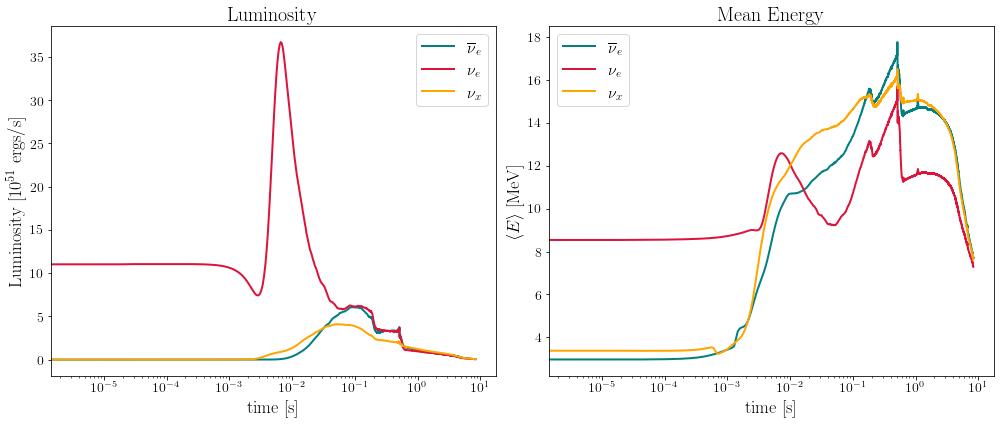

In [29]:
#Ploting
plt.figure(figsize=(14,6), facecolor='w', edgecolor='k')
print("Supernova Model:", models[1])
plt.subplot(1,2,1)
plt.title(r"Luminosity", fontsize = 20)
plt.plot(t_data[0],Lum_data[0],label=r'$\overline{\nu}_e$', lw = 2, color = 'teal')
plt.plot(t_data[1],Lum_data[1],label=r'$\nu_e$', lw = 2, color = 'crimson')
plt.plot(t_data[2],Lum_data[2],label=r'$\nu_x$', lw = 2, color = 'orange')
plt.xlabel(r'time [s]', fontsize = 18)
plt.xscale('log')
plt.ylabel(r'Luminosity [$10^{51}$ ergs/s]', fontsize = 18)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(loc='upper right', fontsize = 16)

plt.subplot(1,2,2)
plt.title(r"Mean Energy", fontsize = 20)
plt.plot(t_data[0],E_data[0],label=r'$\overline{\nu}_e$', lw = 2, color = 'teal')
plt.plot(t_data[1],E_data[1],label=r'$\nu_e$', lw = 2, color = 'crimson')
plt.plot(t_data[2],E_data[2],label=r'$\nu_x$', lw = 2, color = 'orange')
plt.xlabel(r'time [s]', fontsize = 18)
plt.xscale('log')
plt.ylabel(r'$\left \langle E \right \rangle$ [MeV]', fontsize = 18)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(loc='upper left', fontsize = 16)

# plt.subplot(1,3,3)
# plt.title(r"$\alpha$")
# plt.plot(t_data[0],alpha_data[0],label=r'$\bar{\nu}_e$')
# plt.plot(t_data[1],alpha_data[1],label=r'$\nu_e$')
# plt.plot(t_data[2],alpha_data[2],label=r'$\nu_x$')
# plt.xlabel(r'time[s]')
# plt.xscale('log')
# plt.ylabel(r'$\alpha$')
# plt.legend(loc='upper right')

plt.tight_layout()

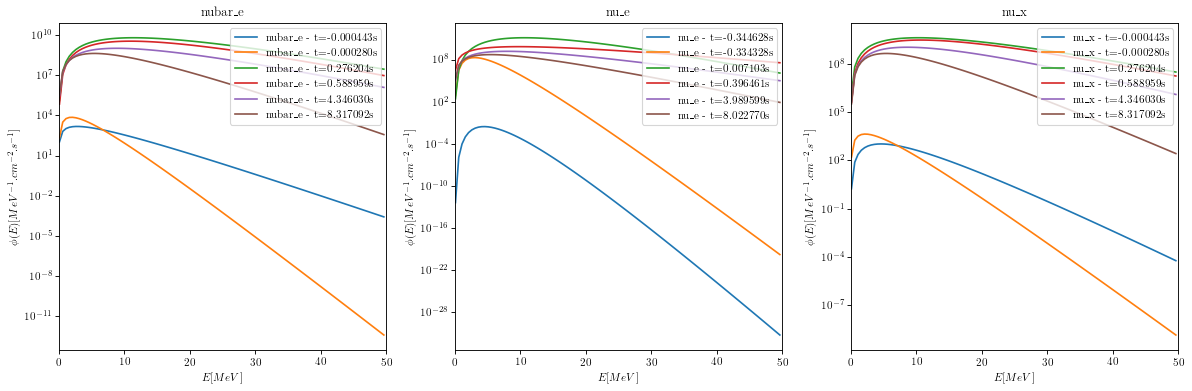

In [15]:
#Spectrum plot
E_vec=np.arange(0.1, 50, 0.5) #eV
phi_vec= np.vectorize(phi)

plt.figure(figsize=(15,5), dpi= 80, facecolor='w', edgecolor='k')

for j in range(len(nu_types)):
    plt.subplot(1,3,j+1)
    for i in [0,10,485,1000,5000,9000]:
        plt.plot(E_vec,phi_vec(E_vec,E_data[j][i],Lum_data[j][i],alpha_data[j][i],10), label=r'%s - t=%fs'%(nu_types[j],t_data[j][i]))
    plt.xlabel(r'$E [MeV]$')
    plt.ylabel(r'$\phi(E) [MeV^{-1}.cm^{-2}.s^{-1}]$')
    plt.yscale('log')
    plt.title(nu_types[j])
    plt.legend(loc='upper right')
    plt.xlim(0,50)
    
plt.tight_layout()

In [16]:
def nu_flux_0_time_int(Enu,D,nu_type):
    inte=0
    for i in range(len(t_data[nu_type])-1):
        delta_t=t_data[nu_type][i+1]-t_data[nu_type][i]
        phi_mean=(phi_vec(Enu,E_data[nu_type][i],Lum_data[nu_type][i],alpha_data[nu_type][i],D)+phi_vec(Enu,E_data[nu_type][i+1],Lum_data[nu_type][i+1],alpha_data[nu_type][i+1],D))/2
        inte= inte+(phi_mean*delta_t)
    return inte
    
def phi_10kpc(E,E_0,L,alpha):
    res=phi_vec(E,E_0,L,alpha,10)
    return res

Took: 1.6046630620956421 minutes


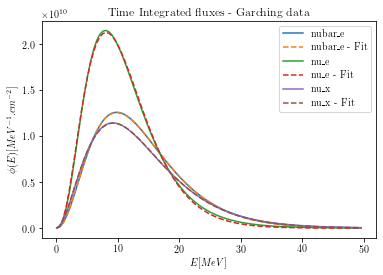

In [17]:
#Fit model to the data
from scipy.optimize import curve_fit
popt, pcov=[],[]
start_time = time.time()
for j in range(len(nu_types)):
    popt_aux, pcov_aux = curve_fit(phi_10kpc,E_vec,nu_flux_0_time_int(E_vec,10,j),p0=[10,5,2.3])
    popt.append(popt_aux)
    #plt.subplot(1,3,j+1)
    plt.plot(E_vec,nu_flux_0_time_int(E_vec,10,j),label=r'%s'%(nu_types[j]))
    plt.plot(E_vec,phi_10kpc(E_vec,popt_aux[0],popt_aux[1],popt_aux[2]),'--',label=r'%s - Fit'%(nu_types[j]))
plt.xlabel(r'$E [MeV]$')
plt.ylabel(r'$\phi(E) [MeV^{-1}.cm^{-2}]$')
#plt.yscale('log')
plt.title("Time Integrated fluxes - Garching data")
plt.legend(loc='upper right')
print("Took: %s minutes" % ((time.time() - start_time)/60))

In [18]:
print(popt[0][0],popt[0][1],popt[0][2])
print(popt[1][0],popt[1][1],popt[1][2])
print(popt[2][0],popt[2][1],popt[2][2])

13.82286935911331 5.40454801562217 2.46668664262376
11.060715561440702 5.697641071063591 2.757723562167347
13.759969363660794 5.0652173619224925 2.0755059533103966


In [22]:
(popt[0][1]+popt[1][1]+popt[2][1])*1e52

1.6167406448608255e+53